In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import sys
sys.path.append('c:/Users/tomas/Documents/Programación/Github/Patricionog/Modulio/Readmes')
import Appio as ap
import Archivio as ac
import Databasio as bd
import Datetimio as dt
import Dictio as dc
import Excelio as ex
import Footio as ft
import Foragio as fg
import Framio as fr
import Graphio as gr
import Highlightio as hg
import Inputio as ip
import Listio as ls
import Mathio as mt
import Notio as nt
import Numbio as nb
import Numpio as nm
import Stringio as st
import Timio as tm
import Tkintio as tn
import Toolio as to

In [27]:
# Pathways en diferentes computadoras dónde están las databases.
Paths = {'PC_Depto': 'J:/My Drive/Experimento/Plantillas finales/',
         'Notebook_Nico': '',
         'PC_Neque': '',
         'PC_Sol': '',
         'PC_Forraje': ''}

In [28]:
# Definir computadora en que se va a trabajar.
PC = 'PC_Depto'

In [29]:
# Definir la base en que se va a operar.
Base = '3. Generales - Filtrado (sin outliers).xlsx'

In [30]:
# Crear dataframe.
df = pd.read_excel(Paths[PC] + Base)
df = df.fillna(value = 0)

In [31]:
df[df['candidato_PASO_2023'] == 'Voto en blanco']['indice_positividad'].mean()

np.float64(14.696969696969697)

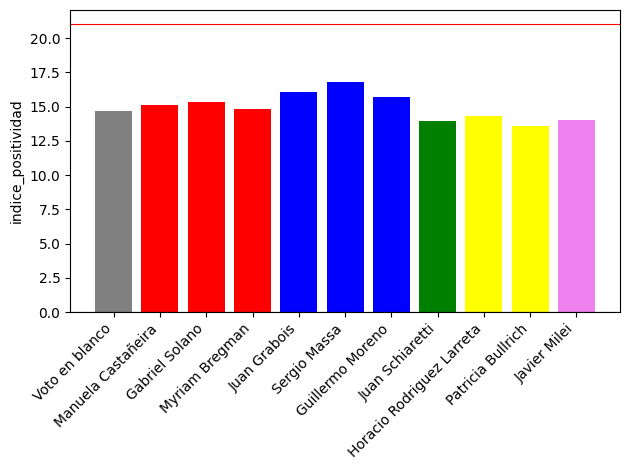

In [32]:
Variables = ['indice_positividad']

for Variable in Variables:

    # Lista de candidatos a graficar (con el orden deseado).
    Candidatos_A_Graficar = ['Voto en blanco',
                            'Manuela Castañeira', 'Gabriel Solano', 'Myriam Bregman',
                            'Juan Grabois', 'Sergio Massa', 'Guillermo Moreno',
                            'Juan Schiaretti',
                            'Horacio Rodriguez Larreta', 'Patricia Bullrich', 
                            'Javier Milei']

    # Lista de colores en el mismo orden.
    Colores = ['gray', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'yellow', 'yellow', 'violet']

    # Medias de variables
    Medias_Variable = []

    for Candidato in Candidatos_A_Graficar:
        Medias_Variable.append(df[df['candidato_PASO_2023'] == Candidato][Variable].mean())


    # Crear la figura y el eje.
    Figura, Grafico_1 = plt.subplots()

    # Graficar las barras con los colores en el orden correcto.
    Barras = Grafico_1.bar(Candidatos_A_Graficar, Medias_Variable, color=Colores)

    # Añadir etiquetas y rotar los nombres de los candidatos.
    Grafico_1.set_ylabel(Variable)
    plt.xticks(rotation=45, ha='right')

    # Añadir una línea de base en y = 21.
    Grafico_1.axhline(21, color='red', linewidth=0.8)

    # Añadir una línea de base en y = 0.
    Grafico_1.axhline(0, color='black', linewidth=0.8)

    # Ajustar el diseño para que las etiquetas no se superpongan.
    plt.tight_layout()

    # Mostrar el gráfico.
    plt.show()


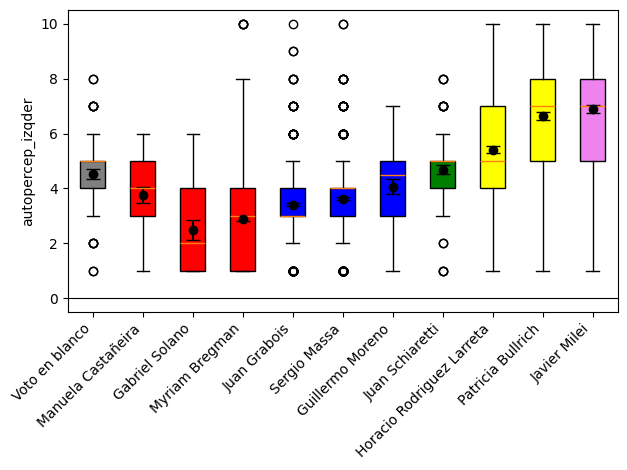

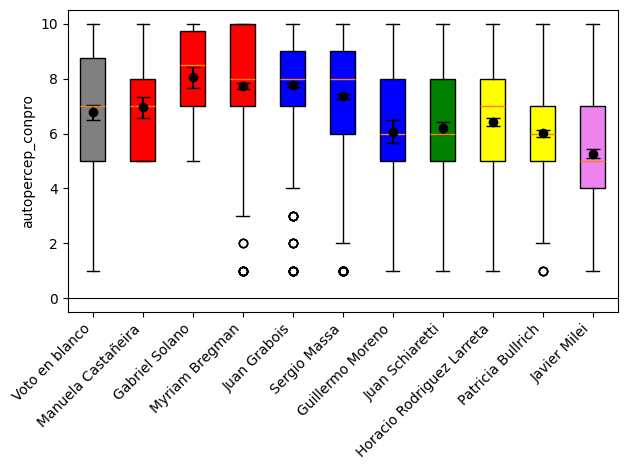

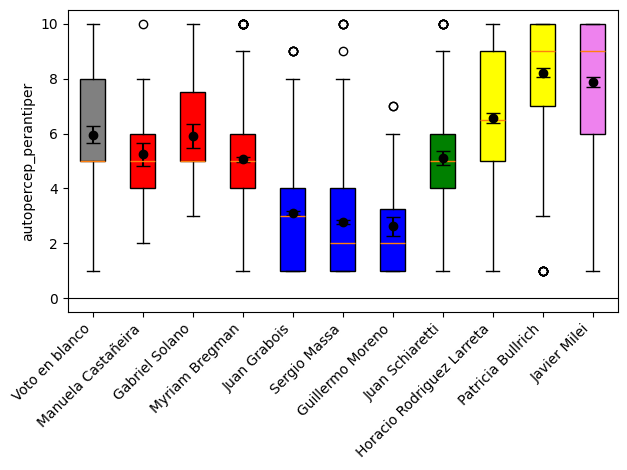

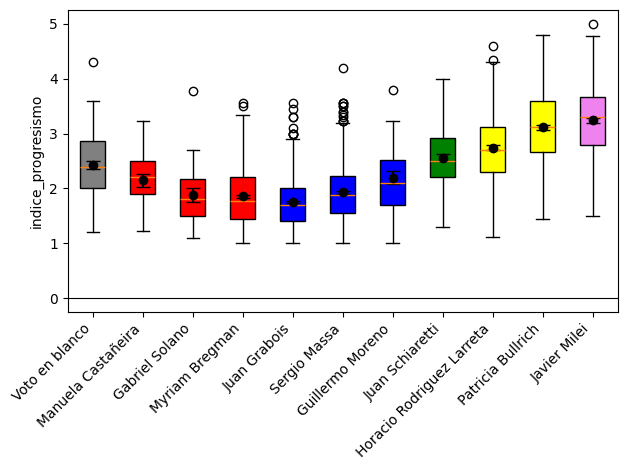

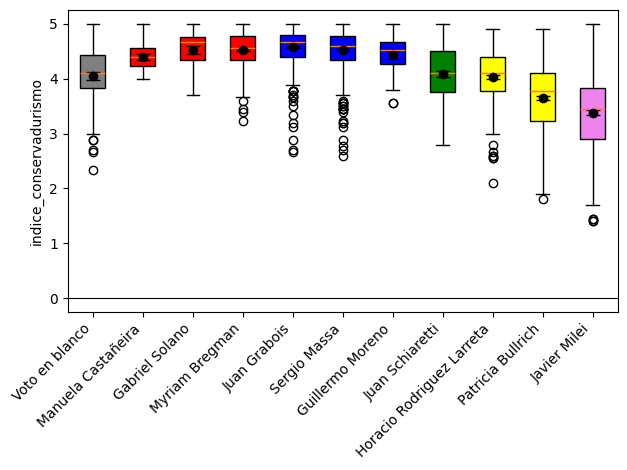

In [34]:
# Variables a graficar.
Variables = ['autopercep_izqder', 'autopercep_conpro', 'autopercep_perantiper', 'indice_progresismo', 'indice_conservadurismo']

for Variable in Variables:

    # Lista de candidatos a graficar (con el orden deseado).
    Candidatos_A_Graficar = ['Voto en blanco',
                            'Manuela Castañeira', 'Gabriel Solano', 'Myriam Bregman',
                            'Juan Grabois', 'Sergio Massa', 'Guillermo Moreno',
                            'Juan Schiaretti',
                            'Horacio Rodriguez Larreta', 'Patricia Bullrich', 
                            'Javier Milei']

    # Lista de colores en el mismo orden.
    Colores = ['gray', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'yellow', 'yellow', 'violet']

    # Crear una lista para almacenar los datos de cada candidato.
    Datos_Candidatos = []

    for Candidato in Candidatos_A_Graficar:
        # Obtener los datos para cada candidato.
        Datos_Candidato = df[df['candidato_PASO_2023'] == Candidato][Variable]
        Datos_Candidatos.append(Datos_Candidato)

    # Crear la figura y el eje.
    Figura, Grafico_1 = plt.subplots()

    # Graficar el boxplot.
    Boxplot = Grafico_1.boxplot(Datos_Candidatos, patch_artist=True, showmeans=True,
                                meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 1})

    # Aplicar los colores personalizados a cada boxplot.
    for patch, color in zip(Boxplot['boxes'], Colores):
        patch.set_facecolor(color)

    # Añadir etiquetas de los candidatos en el eje x.
    Grafico_1.set_xticklabels(Candidatos_A_Graficar, rotation=45, ha='right')

    # Añadir etiquetas y rotar los nombres de los candidatos.
    Grafico_1.set_ylabel(Variable)

    # Añadir una línea de base en y = 21.
    #Grafico_1.axhline(21, color='red', linewidth=0.8)

    # Añadir una línea de base en y = 0.
    Grafico_1.axhline(0, color='black', linewidth=0.8)

    # Calcular y graficar el error estándar para cada candidato.
    for i, Candidato in enumerate(Candidatos_A_Graficar):
        # Obtener los datos del candidato.
        Datos_Candidato = df[df['candidato_PASO_2023'] == Candidato][Variable]
        # Calcular el error estándar.
        Error_Estandar = Datos_Candidato.std() / np.sqrt(len(Datos_Candidato))
        # Obtener la media.
        Media = Datos_Candidato.mean()
        # Graficar el error estándar como una barra.
        Grafico_1.errorbar(i + 1, Media, yerr=Error_Estandar, fmt='o', color='black', capsize=5)

    # Ajustar el diseño para que las etiquetas no se superpongan.
    plt.tight_layout()

    # Mostrar el gráfico.
    plt.show()